## Homework 2

## Part 1: ID3 Decision Tree Learning Algorithm

We know, 

Entropy of a given dataset D is given as, 
$$E(D) =  \sum -P(I)log_{2}P(I)        .....(1)$$ and Information Gain is given as,
$$InformationGain(D,Feature) = E(D) -  \sum E(Feature|x) * P(x)      .....(2)$$ where x is the examples of that feature.

For the given dataset, the information gain for each feature namely, Outlook, Temperature, Humidity and Wind are calculated as follows:

1] Entropy for whole dataset is given as,

$E(D) = -(9/14) log_{2} (9/14) -(5/14) log_{2} (5/14) = 0.940$

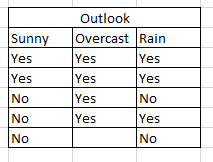

$E(Outlook|Sunny) = - 3/5 log_{2} (3/5) - 2/5 log_{2} (2/5) = 0.971$

$E(Outlook|Overcast) = - 0 log_{2} (1) - 1 log_{2} (1) = 0$

$E(Outlook|Rain) = - 3/5 log_{2} (3/5) - 2/5 log_{2} (2/5) = 0.971$

$P(Sunny) = P(Rain) = 5/14$ and $P(Overcast)=4/14$

Using formula (1),Average Entropy for the Outlook feature is,

$E(Outlook) = (5/14)*0.971 + (4/14)*0 + (5/14)*0.971 = 0.693$

Using formula (2), Information Gain is calculated as,

$I(Outlook) = 0.940 - 0.693 = 0.247$

Similarly, calculating Information Gain for Temperature feature,

$E(Temperature|Hot) = - 2/4 log_{2} (2/4) - 2/4 log_{2} (2/4) = 1$

$E(Temperature|Mild) = - 4/6 log_{2} (4/6) - 2/6 log_{2} (2/6) = 0.91$

$E(Temperature|Cool) = - 3/4 log_{2} (3/4) - 1/4 log_{2} (1/4) = 0.81$

$P(Hot)=4/14$, $P(Mild)=6/14$ and $P(Cool)=4/14$

$E(Temperature) = (4/14)*1 + (6/14)*0.91 + (4/14)*0.81 = 0.911$

$I(Temperature) = 0.940 - 0.911 = 0.029$

Calculating Information Gain for Humidity feature,

$E(Humidity|High) = - 4/7 log_{2} (4/7) - 3/7 log_{2} (3/7) =0.99$

$E(Humidity|Normal) = - 6/7 log_{2} (6/7) - 1/7 log_{2} (1/7) = 0.59$

$P(High)=1/2$ and $P(Normal)=1/2$ 

$E(Humidity) = (1/2)* 0.99 + (1/2)*0.59 = 0.79$

$I(Humidity) = 0.940 - 0.79 = 0.15$

Calculating Information Gain for Wind feature,

$E(Wind|Strong) = - 3/6 log_{2} (3/6) - 3/6 log_{2} (3/6) = 1$

$E(Wind|Weak) = - 6/8 log_{2} (6/8) - 2/8 log_{2} (2/8) = 0.811$

$P(Strong)=6/14$ and $P(Weak)=8/14$ 

$E(Wind) = (8/14)*0.811 + (6/14)*1 = 0.89$

$I(Wind) = 0.940 - 0.89 = 0.048$


Thus, the Information Gain values for various features are summarized below in the table.
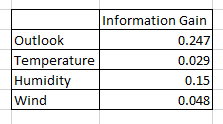

It can be seen that Outlook feature has the highest gain and thus, it is chosen as the root node for the decision tree. Also, observing the PlayTennis (Target) column for different branches of outlook such as Sunny, Overcast and Rain, following table can be made.
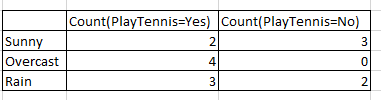

Thus, from the above table, if Outlook is Overcast, PlayTennis is always yes as it contains all the examples of only class yes. Whereas, Sunny and Rain must be split further as they contain mixed examples.

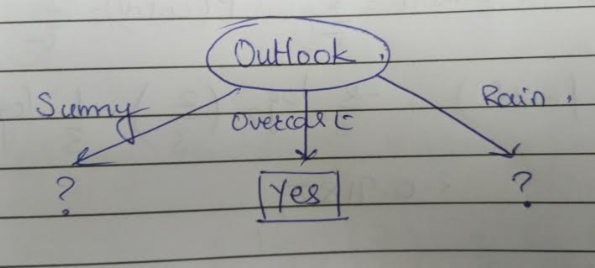

The above figure shows that the tree should be further expanded for Sunny and Rain. Thus, repeating the above steps for sub trees, we get,

2] Entropy for Sunny Dataset is given as,

$E(Sunny) = -(3/5) log_{2} (3/5) -(2/5) log_{2} (2/5) = 0.970$

Calculating Information Gain for Humidity feature,

$E(Humidity|High) = - 3/3 log_{2} (3/3) = 0$

$E(Humidity|Normal) = - 2/2 log_{2} (2/2) = 0$

$I(Humidity) = 0.970 - 0 = 0.970$

Similarly, calculating Information Gain of Temperature and Wind features for the Sunny Dataset, we get the following Table:
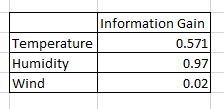

Thus, Humidity has the maximum gain for Sunny Dataset. And also, from the table given in the question for training examples, it can be seen that if the humidity is high, PlayTennis contains all No and if humidity is low, we get a pure data of all Yes. Thus, the tree need be split further for Sunny. 
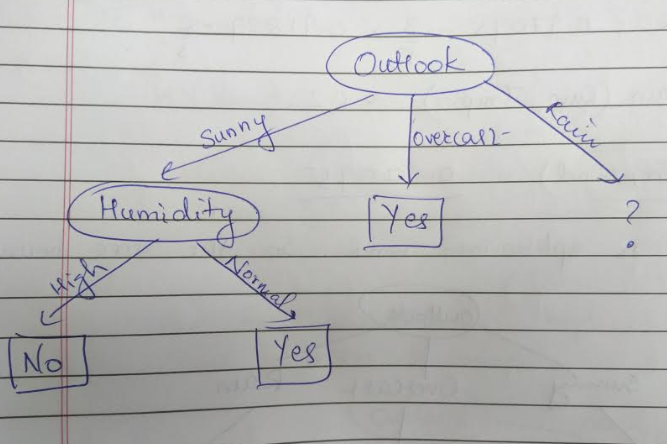

The tree needs to be further split for Rain dataset. The features Humidity and Outlook are removed from the feature set as they have already been realized. So, information gain for only wind and temperature is calculated on the rain dataset. 

3] Entropy for Rain Dataset is given as,

$E(Rain) = -(3/5) log_{2} (3/5) -(2/5) log_{2} (2/5) = 0.970$

Calculating Information Gain for Temperature feature,

$E(Temperature|Mild) = - 2/3 log_{2} (2/3) - 1/3 log_{2} (1/3) = 0.92$

$E(Temperature|Cool) = - 1/2 log_{2} (1/2) - 1/2 log_{2} (1/2) = 1$

$P(Hot)=0$, $P(Mild)=3/5$ and $P(Cool)=2/5$

$E(Temperature) = (2/5)*1 + (3/5)*0.92 = 0.952$

$I(Temperature) = 0.970 - 0.952 = 0.02$

The table shows Information Gain of Temperature and Wind features on Rain Dataset.
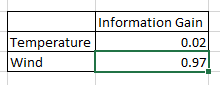

Thus, the information gain for Wind is the highest. And the final tree is shown below.


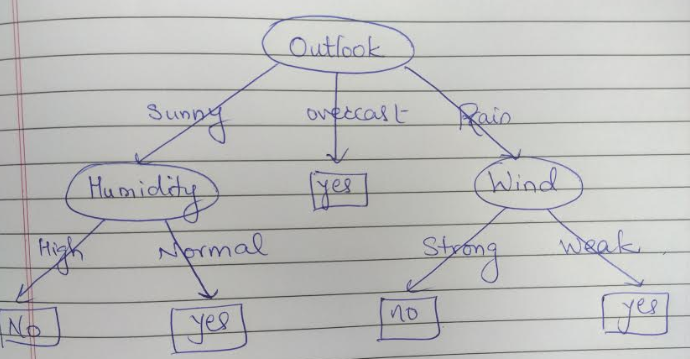

## Part 2a: Implementation of ID3 Algorithm

Import Libraries

In [11]:
import numpy as np
import pandas as pd
import random

Read the csv files of training and testing dataset and split the training dataset into train data and validation data into 70:30 ratio. Also, drop the attribute names(i.e. 1st row) from both the datasets and reset the index to 0.

In [4]:
training_dataset = pd.read_csv("mushrooms_train_updated.csv", delimiter=",", header=None)
testing_dataset = pd.read_csv("mushrooms_test_updated.csv", delimiter=",", header=None)
train_data = training_dataset.iloc[1:3924].reset_index(drop=True)
validation_data = training_dataset[3924:].reset_index(drop=True)
testing_data = testing_dataset.iloc[1:].reset_index(drop=True)

A function named **calc_entropy** is defined which computes the entropy using the formula, $$H(x) = - \sum (P(x=k) * log_{2}(P(x=k)))$$The function has target_column as an argument which is the class of the dataset.

Another function **calc_information** is defined having data (dataset for whose feature information gain needs to be calculated), feature_split (Feature for which information gain needs to be calculated) and target_column (Target feature i.e. class) as its arguments. This function returns the Information Gain of the feature using the formula: $$InformationGain(feature_{d} = Entropy(D) - Entropy(feature_{d}))$$

In [5]:
def calc_entropy(target_column):
    values,counts = np.unique(target_column,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(values))])
    return entropy

def calc_informationGain(data,feature_split,target_column=0):
    # For available dataset, calculate the entropy
    entropy_total = calc_entropy(data[target_column])
    val,count= np.unique(data[feature_split],return_counts=True)  # Return unique values in the feature column and their count
    # Calculate entropy for unique values found above and then add it to get entropy of the feature
    entropy_feature = np.sum([(count[i]/np.sum(count))*calc_entropy(data.where(data[feature_split]==val[i]).dropna()[target_column]) for i in range(len(val))])
    # Calculate Information Gain for the feature
    info_Gain = entropy_total - entropy_feature
    return info_Gain

The **id3Algorithm function** returns the decision tree built using the training dataset. The function takes 5 input parameters: data (dataset for which ID3 is to be built, data = train_data for 1st run), bigData (original dataset), features (attributes of the dataset), targetColumn (class column) and parentNode (value of mode of target feature value of the parent node).

In [6]:
def id3Algorithm(data,bigData,features,targetColumn=0,parentNode = None):   
    #If target values are all same
    if len(np.unique(data[targetColumn])) <= 1:
        return np.unique(data[targetColumn])[0]
    #Return the node which called the current run of the ID3 if the feature space is empty
    elif len(features) == 0:
        return parentNode
    #Return the mode target feature value in bigData for empty dataset
    elif len(data)==0:
        dataEmpty=np.argmax(np.unique(bigData[targetColumn],return_counts=True)[1])
        return np.unique(bigData[targetColumn])[dataEmpty]
    else:
        parentNode = np.unique(data[targetColumn])[np.argmax(np.unique(data[targetColumn],return_counts=True)[1])]
        # Calculate Information Gain for all the available features
        infoGain_features = [calc_informationGain(data,f,targetColumn) for f in features]
        # Select feature having maximum Information Gain
        feature_index = np.argmax(infoGain_features)
        bestFeature = features[feature_index]
        # Insert the bet feature in the dictionary
        idTree = {bestFeature:{}}
        # Remove the best feature from the feature space
        features = [f for f in features if f != bestFeature]
        # for unique values in the best feature, split the dataset and recursively call the ID3 algorithm 
        # and add the small tree obtained from this small dataset to the root node
        for x in np.unique(data[bestFeature]):
            value = x
            smallData = data.where(data[bestFeature] == value).dropna()
            smalltree = id3Algorithm(smallData,bigData,features,targetColumn,parentNode)
            idTree[bestFeature][value] = smalltree    
        return(idTree)

Give train_data as an input to the id3Algorithm function. Thus, **a tree is created having root node 5 (i.e. Odor feature) and nodes 20, 22, 8 and 3 are spore-print-color, habitat, gill-size and cap-color respectively**.

In [20]:
IDtree = id3Algorithm(train_data,train_data,train_data.columns[1:23])
IDtree

{5: {'a': 'e',
  'c': 'p',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': {20: {'b': 'e',
    'h': 'e',
    'k': 'e',
    'n': 'e',
    'o': 'e',
    'r': 'p',
    'w': {22: {'d': {8: {'b': 'e', 'n': 'p'}},
      'g': 'e',
      'l': {3: {'c': 'e', 'n': 'e', 'w': 'p', 'y': 'p'}},
      'p': 'e',
      'w': 'e'}},
    'y': 'e'}},
  'p': 'p',
  's': 'p',
  'y': 'p'}}

The **prediction** function is given an unseen data (validation data and testing data) and predicts its target class i.e. either edible or poissonous mushrooms of a given query containing values of different features based on the decision tree created above. 

The **test** function is used to calculate the accuracy of the prediction function. The result also shows confusion matrix, which is accuracy for true positive (i.e. Target value is edible mushroom ('e') and predicted value is also edible ('e')), false negative (i.e. Target value is poisonous ('p') and predicted value is also poisonous ('p')), true negative (i.e. Target value is edible mushroom ('e') and predicted value is also poisonous ('p')) and false positive (i.e. Target value is poisonous ('p') and predicted value is also edible ('e')).

In [13]:
def prediction(query,IDtree):  
    # Traverse the tree and check if leaf node is reached or a subtree is present
    for key in list(query.keys()):        
        if key in list(IDtree.keys()):
            try:
                answer = IDtree[key][query[key]] 
            except:
                return 1
            answer = IDtree[key][query[key]]
            # Check whether the node is a subtree and recursively call the prediction function
            if isinstance(answer,dict):
                return prediction(query,answer)
            else:
                return answer

def test(data,IDTree):
    count_tp=0
    count_tn=0
    count_fp=0
    count_fn=0
    count=0
    queries = data.iloc[:,1:23].to_dict(orient = "records")
    predictDF = pd.DataFrame(columns=["predict"]) 
    # Prediction call for each example in the validation/test data
    for i in range(len(data)):
        predictDF.loc[i,"predict"] = prediction(queries[i],IDTree)    
    # Calculate Prediction
    print('The prediction accuracy is: ',(np.sum(predictDF["predict"] == data[0])/len(data))*100,'%')

    # For Confusion Matrix
    for i in range(len(data)):
        if (predictDF["predict"][i]== 'e' and predictDF["predict"][i]==data[0][i]):
            count_tp = count_tp+1
        elif (predictDF["predict"][i]== 'p' and predictDF["predict"][i]==data[0][i]):
            count_fn = count_fn+1
        elif (predictDF["predict"][i]== 'e' and predictDF["predict"][i]!=data[0][i]):
            count_tn = count_tn+1
        elif (predictDF["predict"][i]== 'p' and predictDF["predict"][i]!=data[0][i]):
            count_fp = count_fp+1    
        else:
            count=count+1
    print("-----------------Confusion Matrix----------------------")
    print('True Positive Accuracy: ', (count_tp/len(data))*100,'%')
    print('True Negative Accuracy: ', (count_tn/len(data))*100,'%')
    print('False Positive Accuracy: ', (count_fp/len(data))*100,'%')
    print('False Negative Accuracy: ', (count_fn/len(data))*100,'%')

## Part 2b:

Prediction Accuracy calculated on Validation Dataset. Also, confusion Matrix is provided.

In [14]:
test(validation_data,IDtree)

The prediction accuracy is:  100.0 %
-----------------Confusion Matrix----------------------
True Positive Accuracy:  49.97163925127624 %
True Negative Accuracy:  0.0 %
False Positive Accuracy:  0.0 %
False Negative Accuracy:  50.02836074872376 %


Prediction Accuracy calculated on Testing Dataset. Also, confusion Matrix is provided.

In [15]:
test(testing_data,IDtree)

The prediction accuracy is:  100.0 %
-----------------Confusion Matrix----------------------
True Positive Accuracy:  51.55865463494668 %
True Negative Accuracy:  0.0 %
False Positive Accuracy:  0.0 %
False Negative Accuracy:  48.44134536505332 %


## Part 2c: Implementation of Pruning Algorithm

**Majority** Function returns the majority label of the given node else it returns a random selected label if both 'e' and 'p' lables have equal counts in the node. This is useful for pruning in order to replace a subtree with the answer of this function.

**Pruning** Function takes the tree and the pruning factor as its input. Pruning factor is the node(subtree) upto which pruning is done.

In [17]:
def majority(subnode):
    count_e=0
    count_p=0
    majority_list=[]
    # For the subtree, calculate the majority label
    for key,info in subnode.items():
        for k,i in info.items():
            majority_list.append(i)
            if i=='e':
                count_e=count_e+1
            else: 
                count_p=count_p+1
        if count_e > count_p:
            return 'e'
        if count_p > count_e:
            return 'p'
        # If both the labels are equally likely, replace the node with randomly generated value
        if count_e == count_p:
            return majority_list[random.randrange(len(majority_list))]

def pruning(treeID,pruning_node):
    # Traverse the Decision Tree
    for parent,child in treeID.items():
        for key,info in child.items():
            # Check whether the node is a subtree
            if isinstance(child[key],dict):
                for subnode,subchild in child[key].items():   
                    # Check whether the node is the pruning node
                    if subnode==pruning_node:
                        # Replace the subtree with the majority label
                        child[key]= majority(child[key])
                        return (treeID)              
                pruning(child[key],pruning_node)

## Part 2d:

Calculate Accuracy for pruning of different nodes on Validation dataset.

In [18]:
def test_prune(data,IDTree):
    queries = data.iloc[:,1:23].to_dict(orient = "records")
    predictDF = pd.DataFrame(columns=["predict"]) 
    # Prediction call for each example in the validation/test data
    for i in range(len(data)):
        predictDF.loc[i,"predict"] = prediction(queries[i],IDTree)    
    # Calculate Prediction
    print('The prediction accuracy is: ',(np.sum(predictDF["predict"] == data[0])/len(data))*100,'%')

**Run the pruning function for nodes 3, 8 22 and 20 as they appear on the tree from the bottom and for each, compute the accuracy on validation examples.**

In [21]:
for pruning_node in [3,8,22,20]:
    pruning(IDtree,pruning_node)
    print('Pruning Node ', pruning_node)
    test_prune(validation_data,IDtree)

Pruning Node  3
The prediction accuracy is:  99.60294951786727 %
Pruning Node  8
The prediction accuracy is:  99.60294951786727 %
Pruning Node  22
The prediction accuracy is:  99.37606352807714 %
Pruning Node  20
The prediction accuracy is:  98.35507657402155 %


After pruning till 20 node: we get the following tree:

In [22]:
IDtree

{5: {'a': 'e',
  'c': 'p',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': 'e',
  'p': 'p',
  's': 'p',
  'y': 'p'}}

As can be seen from the above results on Validation Dataset, accuracy decreases as the nodes fro the bottom are removed. However, accuracy for pruning node 3 and 8 are same. Thus, Pruning Factor 8 is used to prune the tree and this tree used for testing data.

In [25]:
IDtree = id3Algorithm(train_data,train_data,train_data.columns[1:23])
IDtree

{5: {'a': 'e',
  'c': 'p',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': {20: {'b': 'e',
    'h': 'e',
    'k': 'e',
    'n': 'e',
    'o': 'e',
    'r': 'p',
    'w': {22: {'d': {8: {'b': 'e', 'n': 'p'}},
      'g': 'e',
      'l': {3: {'c': 'e', 'n': 'e', 'w': 'p', 'y': 'p'}},
      'p': 'e',
      'w': 'e'}},
    'y': 'e'}},
  'p': 'p',
  's': 'p',
  'y': 'p'}}

Since, Dictionary is used, the tree is updated using pruning. Therefore, in order to get the original decision tree, id3Algorithm function needs to be called to create the tree. In order to prune tree till 8th node, pruning function is called in a for loop where the tree is pruned first with node 3 and the with node 8.

In [26]:
for pruning_node in [3,8]:
    pruning(IDtree,pruning_node)
IDtree

{5: {'a': 'e',
  'c': 'p',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': {20: {'b': 'e',
    'h': 'e',
    'k': 'e',
    'n': 'e',
    'o': 'e',
    'r': 'p',
    'w': {22: {'d': 'e', 'g': 'e', 'l': 'e', 'p': 'e', 'w': 'e'}},
    'y': 'e'}},
  'p': 'p',
  's': 'p',
  'y': 'p'}}

In [27]:
test(testing_data,IDtree)

The prediction accuracy is:  99.58982772764561 %
-----------------Confusion Matrix----------------------
True Positive Accuracy:  51.55865463494668 %
True Negative Accuracy:  0.41017227235438886 %
False Positive Accuracy:  0.0 %
False Negative Accuracy:  48.03117309269893 %


## Check Pruning Function

In [32]:
IDtree = id3Algorithm(train_data,train_data,train_data.columns[1:23])
IDtree

{5: {'a': 'e',
  'c': 'p',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': {20: {'b': 'e',
    'h': 'e',
    'k': 'e',
    'n': 'e',
    'o': 'e',
    'r': 'p',
    'w': {22: {'d': {8: {'b': 'e', 'n': 'p'}},
      'g': 'e',
      'l': {3: {'c': 'e', 'n': 'e', 'w': 'p', 'y': 'p'}},
      'p': 'e',
      'w': 'e'}},
    'y': 'e'}},
  'p': 'p',
  's': 'p',
  'y': 'p'}}

In [29]:
# For pruning_node=3
pruning(IDtree,pruning_node=3)
IDtree

{5: {'a': 'e',
  'c': 'p',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': {20: {'b': 'e',
    'h': 'e',
    'k': 'e',
    'n': 'e',
    'o': 'e',
    'r': 'p',
    'w': {22: {'d': {8: {'b': 'e', 'n': 'p'}},
      'g': 'e',
      'l': 'p',
      'p': 'e',
      'w': 'e'}},
    'y': 'e'}},
  'p': 'p',
  's': 'p',
  'y': 'p'}}

In [30]:
# For pruning_node=3
pruning(IDtree,pruning_node=8)
IDtree

{5: {'a': 'e',
  'c': 'p',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': {20: {'b': 'e',
    'h': 'e',
    'k': 'e',
    'n': 'e',
    'o': 'e',
    'r': 'p',
    'w': {22: {'d': 'e', 'g': 'e', 'l': 'p', 'p': 'e', 'w': 'e'}},
    'y': 'e'}},
  'p': 'p',
  's': 'p',
  'y': 'p'}}

In [31]:
# For pruning_node=3
pruning(IDtree,pruning_node=22)
IDtree

{5: {'a': 'e',
  'c': 'p',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': {20: {'b': 'e',
    'h': 'e',
    'k': 'e',
    'n': 'e',
    'o': 'e',
    'r': 'p',
    'w': 'e',
    'y': 'e'}},
  'p': 'p',
  's': 'p',
  'y': 'p'}}

## Extra Runs:

Below code, 3,8,20uns the pruning function for different nodes such as 3,8,22 and 20 and compute the prediction accuracy on validation and testing data.

In [35]:
IDtree = id3Algorithm(train_data,train_data,train_data.columns[1:23])
for pruning_node in [3,8,22,20]:
    pruning(IDtree,pruning_node)
    print('\nPruning Node: ', pruning_node)
    print("-----------Accuracy on Validation Data----------------")
    test(validation_data,IDtree)
    print("------------Accuracy on Testing Data------------------")
    test(testing_data,IDtree)


Pruning Node:  3
-----------Accuracy on Validation Data----------------
The prediction accuracy is:  99.60294951786727 %
-----------------Confusion Matrix----------------------
True Positive Accuracy:  49.97163925127624 %
True Negative Accuracy:  0.39705048213272826 %
False Positive Accuracy:  0.0 %
False Negative Accuracy:  49.631310266591036 %
------------Accuracy on Testing Data------------------
The prediction accuracy is:  99.83593109105826 %
-----------------Confusion Matrix----------------------
True Positive Accuracy:  51.55865463494668 %
True Negative Accuracy:  0.16406890894175555 %
False Positive Accuracy:  0.0 %
False Negative Accuracy:  48.277276456111565 %

Pruning Node:  8
-----------Accuracy on Validation Data----------------
The prediction accuracy is:  99.37606352807714 %
-----------------Confusion Matrix----------------------
True Positive Accuracy:  49.97163925127624 %
True Negative Accuracy:  0.6239364719228588 %
False Positive Accuracy:  0.0 %
False Negative Accu

## Observation:

The Prediction Accuracy on testing data without pruning is shown below:
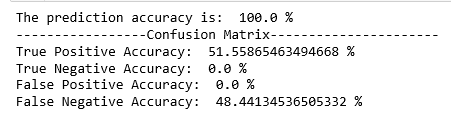
The Prediction Accuracy on testing data with pruning is shown below:

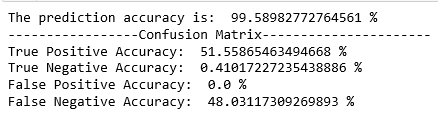

Since, in pruning, we are replacing a node in the decision tree with an approximated majority label, the prediction accuracy has slightly reduced by 0.42%. From the above Confusion matrix result, error is in when the actual target is edible and predicted is poisonous.

Pruning Algorithm works for overfitting condition (i.e. Testing Accuracy is very low for a high training Accuracy). However, in this case, overfitting is not faced as Testing Accuracy is 100%. Thus, pruning is done, in order to see if accuracy changes drastically or slightly by simplifying the decision tree.

It is observed that the prediction accuracy changes very little with pruning.

## Reference:

* https://www.python-course.eu/Decision_Trees.php